# Частина 1

## В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist. На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import keras
import numpy as np
from keras import layers
from keras import models
from keras import utils
import matplotlib.pyplot as plt
import time
import seaborn as sns

**Крок 1: завантаження Датасету**

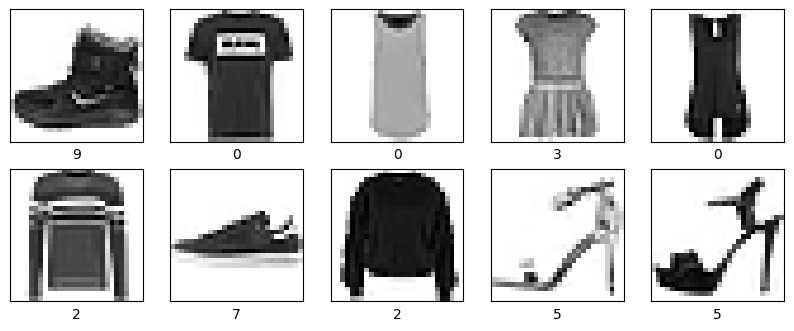

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Визначемо які значення є в train_targets

In [3]:
unique_labels = np.unique(y_train)
print("Унікальні мітки в train_targets:", unique_labels)

Унікальні мітки в train_targets: [0 1 2 3 4 5 6 7 8 9]


**Виконаєм нормалізацію пікселів зображень у наборах даних навчання (train_images) і тестування (test_images)**

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0 

print("Нормалізовані значення train_images:", x_train.shape)
print("Нормалізовані значення test_images:", x_test.shape)
print("*"*50)
print("Мінімальне значення пікселів train_images:", x_train.min())
print("Максимальне значення пікселів train_images:", x_test.max())
print("*"*50)
print("Мінімальне значення пікселів test_images:", x_train.min())
print("Максимальне значення пікселів test_images:", x_test.max())

Нормалізовані значення train_images: (60000, 28, 28)
Нормалізовані значення test_images: (10000, 28, 28)
**************************************************
Мінімальне значення пікселів train_images: 0.0
Максимальне значення пікселів train_images: 1.0
**************************************************
Мінімальне значення пікселів test_images: 0.0
Максимальне значення пікселів test_images: 1.0


**Зробимо поділ набору даних на навчальний і валідаційний набори**

In [5]:
x_train = x_train[:5000]
x_val = x_train[5000:]

y_train = y_train[:5000]
y_val = y_train[5000:]


**Створимо саму модель**

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5834 - loss: 1.1913 - val_accuracy: 0.7773 - val_loss: 0.6081
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8209 - loss: 0.5015 - val_accuracy: 0.8137 - val_loss: 0.5237
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8443 - loss: 0.4184 - val_accuracy: 0.8202 - val_loss: 0.4843
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8624 - loss: 0.3764 - val_accuracy: 0.8427 - val_loss: 0.4420
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8903 - loss: 0.3136 - val_accuracy: 0.8591 - val_loss: 0.4010
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9068 - loss: 0.2707 - val_accuracy: 0.8598 - val_loss: 0.4032
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9168 - loss: 0.2342 - val_accuracy: 0.8567 - val_loss: 0.3994
Epoch 8/10
157/157 ━━━━━━━

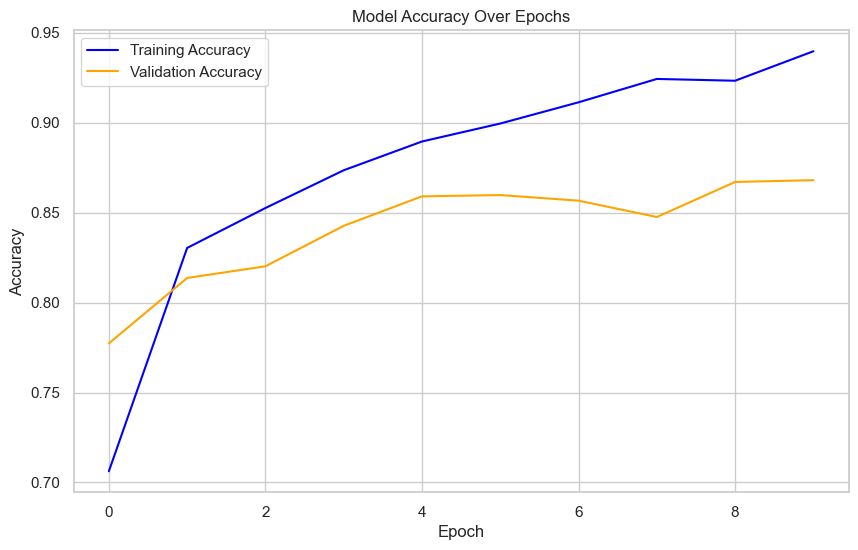

In [13]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=64, 
                    kernel_size=2, 
                    padding='same', 
                    activation='relu', 
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),      
    
      layers.Conv2D(filters=32, 
                    kernel_size=2, 
                    padding='same', 
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),      
      layers.Flatten(),
      layers.Dense(256, activation='relu'),      
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Порівнюючи результати точності нашої найкращої можелі з попереднього заняття (93,41%), згорткова нейромережа з першого разу показала кращий результат 94,71%, що на 1,3% краще**

# ВАРІАНТ - 2

**Змінемо кількість фільтрів у згорткових шарах: в першому з 64 на 32 а в другому з 32 на 64**

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5956 - loss: 1.1204 - val_accuracy: 0.8064 - val_loss: 0.5070
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8426 - loss: 0.4425 - val_accuracy: 0.8305 - val_loss: 0.4644
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8559 - loss: 0.4003 - val_accuracy: 0.8321 - val_loss: 0.4602
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8880 - loss: 0.3171 - val_accuracy: 0.8556 - val_loss: 0.4064
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8995 - loss: 0.2879 - val_accuracy: 0.8531 - val_loss: 0.4198
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9098 - loss: 0.2527 - val_accuracy: 0.8614 - val_loss: 0.3977
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9309 - loss: 0.2117 - val_accuracy: 0.8589 - val_loss: 0.4255
Epoch 8/10
157/157 ━━━━━━━

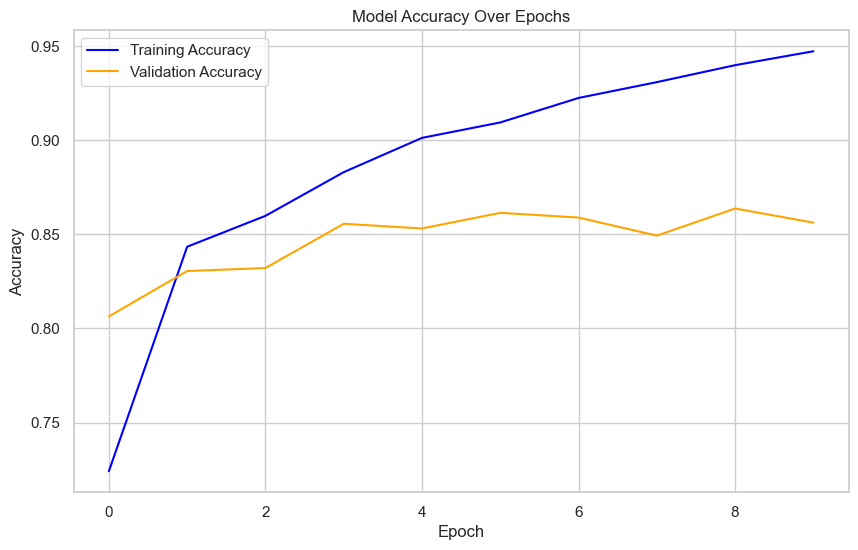

In [14]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=32, 
                    kernel_size=2, 
                    padding='same', 
                    activation='relu', 
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),      
    
      layers.Conv2D(filters=64,  
                    kernel_size=2, 
                    padding='same', 
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),      
      layers.Flatten(),
      layers.Dense(256, activation='relu'),      
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Зміна кількості фільрів показала гарний результат, підвищила точність моделі.
модель успішно поліпшується з кожною епохою, але, можливо, починає перенавчатися після деякої кількості епох.**

# ВАРІАНТ - 3

**Змінимо кількість шарів та їхню кількість**

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5229 - loss: 1.3380 - val_accuracy: 0.7416 - val_loss: 0.6579
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8010 - loss: 0.5307 - val_accuracy: 0.8036 - val_loss: 0.5275
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8414 - loss: 0.4569 - val_accuracy: 0.8198 - val_loss: 0.4958
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8514 - loss: 0.4040 - val_accuracy: 0.8400 - val_loss: 0.4370
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8724 - loss: 0.3554 - val_accuracy: 0.8412 - val_loss: 0.4319
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8859 - loss: 0.3118 - val_accuracy: 0.8503 - val_loss: 0.4219
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8917 - loss: 0.3070 - val_accuracy: 0.8611 - val_loss: 0.3946
Epoch 8/10
157/157 ━━━━━━━

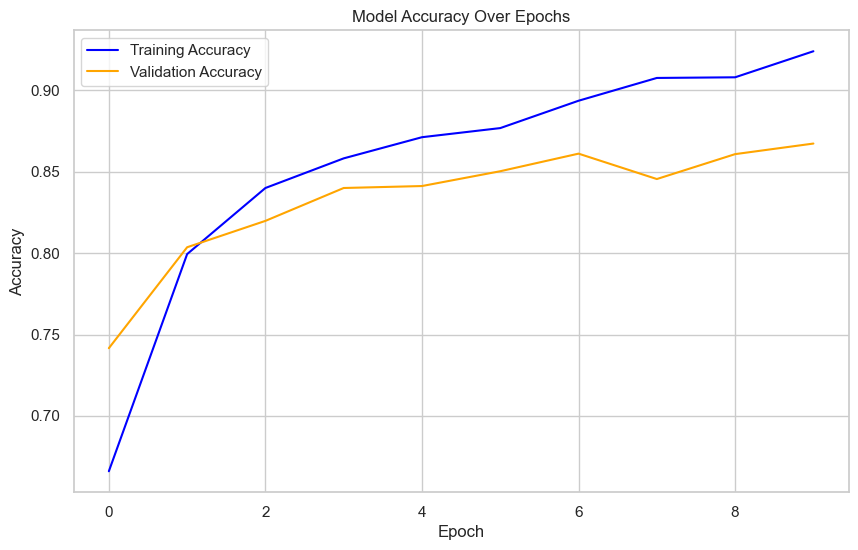

In [15]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=32, 
                    kernel_size=2, 
                    padding='same', 
                    activation='relu', 
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),      
    
      layers.Conv2D(filters=64,  
                    kernel_size=2, 
                    padding='same', 
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),   

      layers.Conv2D(filters=128,  
                    kernel_size=2, 
                    padding='same', 
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),  

      layers.Flatten(),
      layers.Dense(256, activation='relu'),      
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Точність моделі складає 93,07%, що є гарним результатом. Точність моделі на валідаційних даних також збільшується з кожною епохою, а функція втрат зменшується, висновок - модель добре узагальнює дані і не перенавчається.**

# ВАРІАНТ - 4

**Змінемо функцію активації relu на elu для повїязувальних шарів**

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6347 - loss: 1.0301 - val_accuracy: 0.8117 - val_loss: 0.5137
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8503 - loss: 0.4283 - val_accuracy: 0.8217 - val_loss: 0.4997
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8764 - loss: 0.3613 - val_accuracy: 0.8566 - val_loss: 0.4073
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8839 - loss: 0.3125 - val_accuracy: 0.8569 - val_loss: 0.4074
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8965 - loss: 0.2782 - val_accuracy: 0.8610 - val_loss: 0.3948
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9179 - loss: 0.2318 - val_accuracy: 0.8566 - val_loss: 0.4024
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9218 - loss: 0.2248 - val_accuracy: 0.8515 - val_loss: 0.4493
Epoch 8/10
157/157 ━━━━━━━

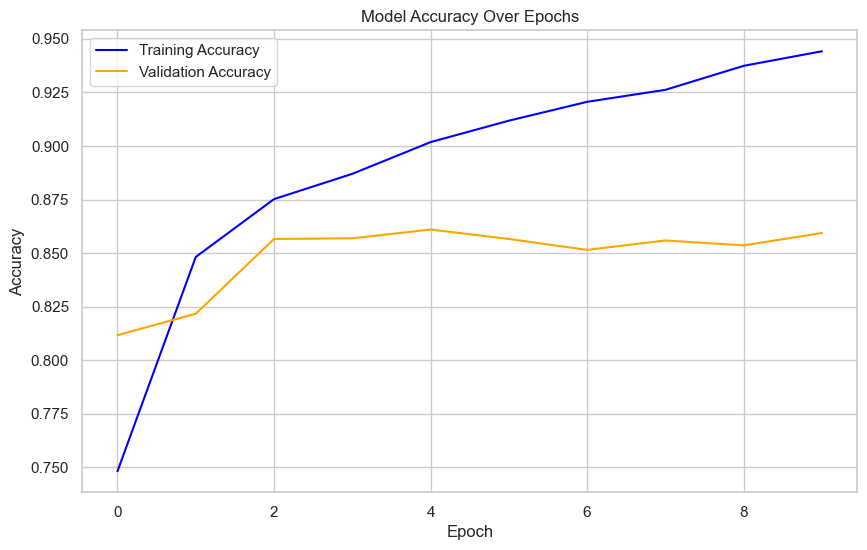

In [16]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=32, 
                    kernel_size=2, 
                    padding='same', 
                    activation='relu', 
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),      
    
      layers.Conv2D(filters=64,  
                    kernel_size=2, 
                    padding='same', 
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),   

      layers.Flatten(),
      layers.Dense(256, activation='elu'),  
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Точність моделі висока - 94,29% але функція втрат на валідаційних даних має тенденцію до коливань, це вказує на нестабільність у навчанні або наявність "шуму" в даних**